In [1]:
%pip install geopandas

     |████████████████████████████████| 1.1 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 22.1 MB/s eta 0:00:01█████▎             | 7.0 MB 22.1 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 6.7 MB/s eta 0:00:01                   | 2.7 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.5 MB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 23.2 MB/s eta 0:00:01��█████████████▎   | 13.8 MB 23.2 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 23.8 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 28.2 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 14.6 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 61 kB 6.0 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point
from shapely import wkt
from geopandas import GeoSeries
import pandas as pd

In [2]:
def readPolygonFromFile(filename):
  with open(filename) as f:
      str = [word for line in f for word in line.split(", ")]
  
  geom = []
  for i in range(len(str)):
      lon, lat = str[i].split(" ")
      geom.append((float(lon), float(lat)))
  p1 = Polygon(geom)
  poly_gdf = gpd.GeoDataFrame(geometry = [p1], crs = "EPSG:3346")
  return poly_gdf

In [3]:
exteriorLine = readPolygonFromFile("kaunas.txt")
exteriorLineScaled = exteriorLine.to_crs(epsg=4326)

In [4]:
# importing population data file
#geo_data = gpd.read_file('500kaunasOnly.csv')
#geo_data = gpd.read_file('500pop/grid500.shp')
#geo_data_pop = geo_data.to_crs(epsg=4326)

geo_data_merged = gpd.read_file('500kaunasOnly.csv')
geo_data_merged['geometry_y'] = geo_data_merged['geometry_y'].apply(wkt.loads)
# geo_data_merged = geo_data_merged.to_crs(epsg=4326)
geo_data_merged.set_crs(epsg=4326, inplace=True)

,geometry_y,normalised,color,pop_normalised,eco_normalised,geometry
0,"POLYGON ((23.78934146399787 54.934949759595, 2...",0.4514228128264097,#8b7300,0.46487645930433175,0.43796916634848776,None
1,POLYGON ((23.883201386720494 54.85421308237045...,0.6915070867924784,#4eb000,0.8289533127148541,0.5540608608701028,None
2,"POLYGON ((23.93766578638817 54.88120771544305,...",0.40219229491240827,#986600,0.3664154234763288,0.43796916634848776,None
3,POLYGON ((24.038993599013793 54.91715654662812...,0.5262982597921166,#788600,0.38244396419251536,0.6701525553917178,None
4,POLYGON ((23.898560216086185 54.93958230991583...,1.041843964194043,#00ff00,1.142654752445933,0.9410331759421529,None
...,...,...,...,...,...,...
609,POLYGON ((24.054566722996405 54.89918102943989...,0.3686470943496918,#a05e00,0.37671948536530586,0.36057470333407776,None
610,POLYGON ((24.05460319642816 54.926135278312344...,0.4029939673129487,#986600,0.44541323129181953,0.36057470333407776,None
611,"POLYGON ((24.070196276939317 54.9216349044404,...",0.3709368858805756,#a05e00,0.38129906842707345,0.36057470333407776,None
612,POLYGON ((24.077978482511487 54.91264541132877...,0.36979199011513375,#a05e00,0.3790092768961897,0.36057470333407776,None


In [5]:
# Z-Score Normalization
def linearNormalize(dataset):
    print(dataset.head())
    print("min", dataset.min())
    print("max", dataset.max())
    return (dataset-dataset.min())/ (dataset.max() - dataset.min())

def zNormalize(dataset):
    return (((dataset - dataset.mean()) / dataset.std()) + 1) / 2

def meanNormalize(dataset1, dataset2):
    return (dataset1 + dataset2) / 2

In [6]:
def getColor(val):
    red = int(255*(1 - max(min(float(val), 1),0)))
    green = int(255*max(min(float(val), 1),0))
    #print("c", val, red, green)
    color = '#%02x%02x%02x' % (red, green, 0)
    #print(color)
    return color

def drawRectangle(x, y, val):
    return matplotlib.patches.Rectangle((x, y), 0.00159, 0.00004, color=getColor(val)+'33')

                                          geometry_y           normalised  \
0  POLYGON ((23.78934146399787 54.934949759595, 2...   0.4514228128264097   
1  POLYGON ((23.883201386720494 54.85421308237045...   0.6915070867924784   
2  POLYGON ((23.93766578638817 54.88120771544305,...  0.40219229491240827   
3  POLYGON ((24.038993599013793 54.91715654662812...   0.5262982597921166   
4  POLYGON ((23.898560216086185 54.93958230991583...    1.041843964194043   

     color       pop_normalised       eco_normalised geometry  
0  #887600  0.46487645930433175  0.43796916634848776     None  
1  #2bd300   0.8289533127148541   0.5540608608701028     None  
2  #a15d00   0.3664154234763288  0.43796916634848776     None  
3  #9d6100  0.38244396419251536   0.6701525553917178     None  
4  #00ff00    1.142654752445933   0.9410331759421529     None  


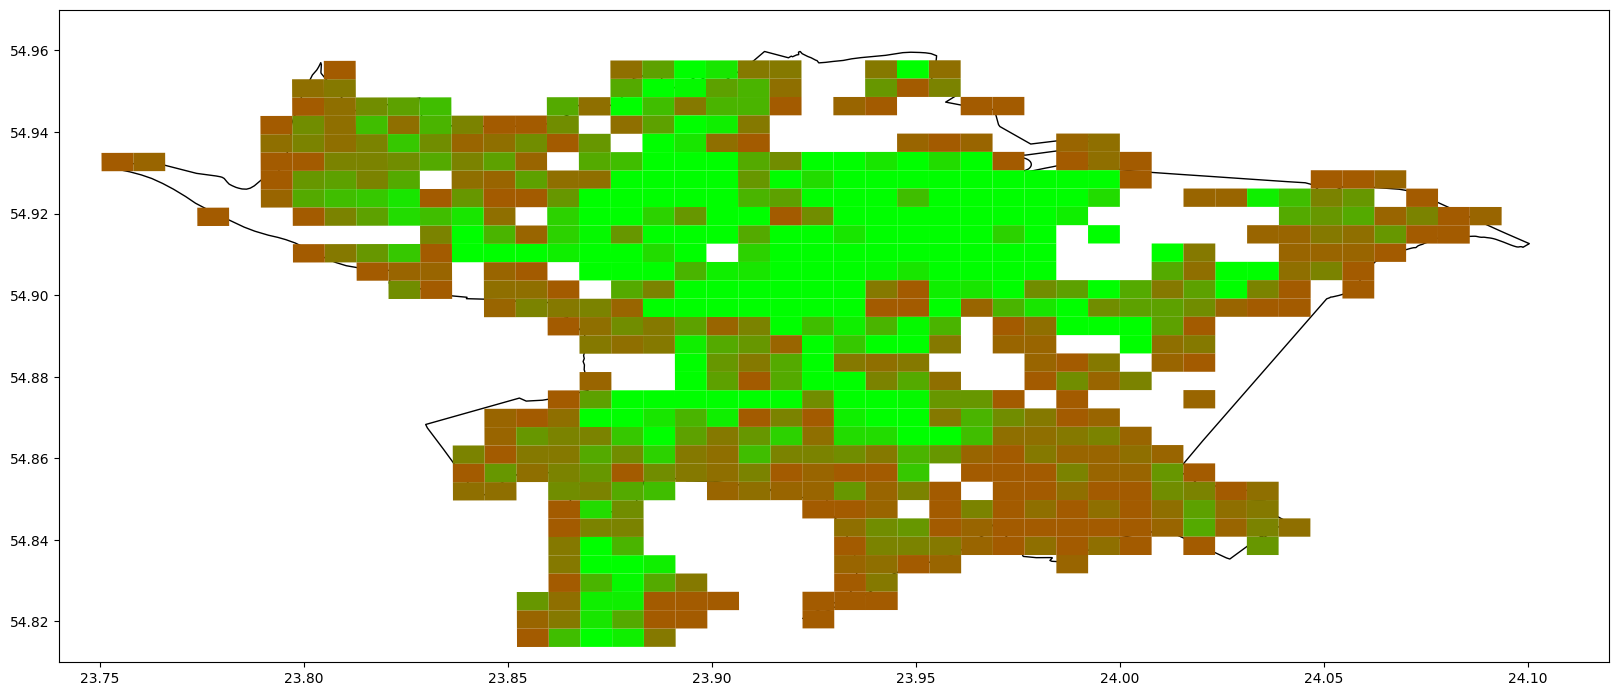

Text(0.5, 0.98, 'Relevant economic sectors')

In [9]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1,1, figsize=(20, 10))

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))

exteriorLineScaled.plot(ax = ax, facecolor="none", edgecolor="black")

print(geo_data_merged.head())
geo_data_merged['color'] = geo_data_merged['normalised'].apply(getColor)
geo_data_merged_gdf = gpd.GeoDataFrame(geo_data_merged, geometry='geometry_y')

# without this line the plot is well proportioned, but if I uncomment this line it becase less tall the large.
geo_data_merged_gdf.plot(facecolor=geo_data_merged_gdf.color, ax=ax, aspect='equal')
plt.show()
ax.set_aspect('equal')

fig.suptitle('Relevant economic sectors')

In [8]:
import time

In [29]:
def get_normalized_value_at_coordinates(dataframe, x, y):
    point = Point(x, y)

    for index, row in dataframe.iterrows():
        polygon = row['geometry_y']

        if polygon is not None and polygon.contains(point):
            return row['normalised']

    # If no polygon contains the point at the coordinates, return 0
    return 0

start = time.time()
print("Almost best case:", get_normalized_value_at_coordinates(geo_data_merged, 21.13, 55.72), "(",(time.time() - start), "s)")
start = time.time()
print("Classic case:", get_normalized_value_at_coordinates(geo_data_merged, 23.90, 54.895), "(",(time.time() - start), "s)")
start = time.time()
print("Worst case:", get_normalized_value_at_coordinates(geo_data_merged, 23.90, 54.82), "(",(time.time() - start), "s)")

Almost best case: 0 ( 0.09978437423706055 s)
Classic case: 2.850084239096847 ( 0.033306121826171875 s)
Worst case: 0 ( 0.08857917785644531 s)
